Split folders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from PIL import Image

In [3]:
# 9248 images in raw folder with 3 txt files, bbox_labels,bbox_training,bbox_val
main_list = pd.read_csv("images/raw/bbox_labels.txt",sep=" ",header=None,names=["filename","X1","Y1","X2","Y2","label","nil"])
trg_list = pd.read_csv("images/raw/bbox_training.txt",sep=" ",header=None,names=["filename","X1","Y1","X2","Y2","label","nil"])
val_list = pd.read_csv("images/raw/bbox_val.txt",sep=" ",header=None,names=["filename","X1","Y1","X2","Y2","label","nil"])

main_list = main_list.drop(columns="nil")
val_list = val_list.drop(columns="nil")
trg_list = trg_list.drop(columns="nil")

In [4]:
def get_floor(raw_name):
    floor = raw_name[:12]
    floor_num = floor[-2:]
    return floor_num

main_list["floor"] = main_list["filename"].apply(lambda x: get_floor(x))

val_list["floor"] = val_list["filename"].apply(lambda x: get_floor(x))

trg_list["floor"] = trg_list["filename"].apply(lambda x: get_floor(x))

<AxesSubplot:xlabel='floor', ylabel='count'>

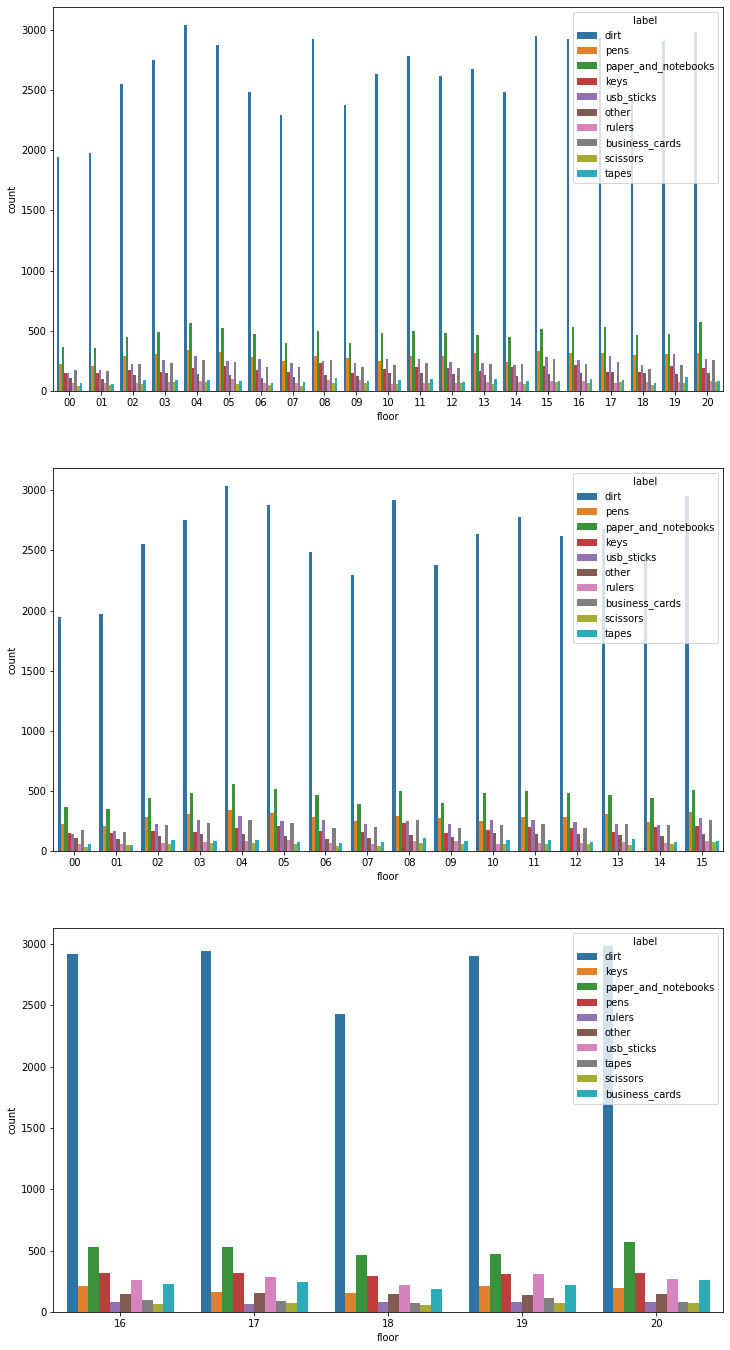

In [5]:
fig,axes = plt.subplots(3,1,figsize=(12,24))

sns.countplot(ax=axes[0],data=main_list,x="floor",hue="label")
sns.countplot(ax=axes[1],data=trg_list,x="floor",hue="label")
sns.countplot(ax=axes[2],data=val_list,x="floor",hue="label")



In [6]:
def labels_to_obj(label):
    if label == "dirt" or label == "object":
        return label
    else:
        return "object"

cleaned_main_list = main_list.copy()
cleaned_main_list["label"] = cleaned_main_list["label"].apply(lambda x: labels_to_obj(x))

cleaned_val_list = val_list.copy()
cleaned_val_list["label"] = cleaned_val_list["label"].apply(lambda x: labels_to_obj(x))

cleaned_trg_list = trg_list.copy()
cleaned_trg_list["label"] = cleaned_trg_list["label"].apply(lambda x: labels_to_obj(x))


<AxesSubplot:xlabel='floor', ylabel='count'>

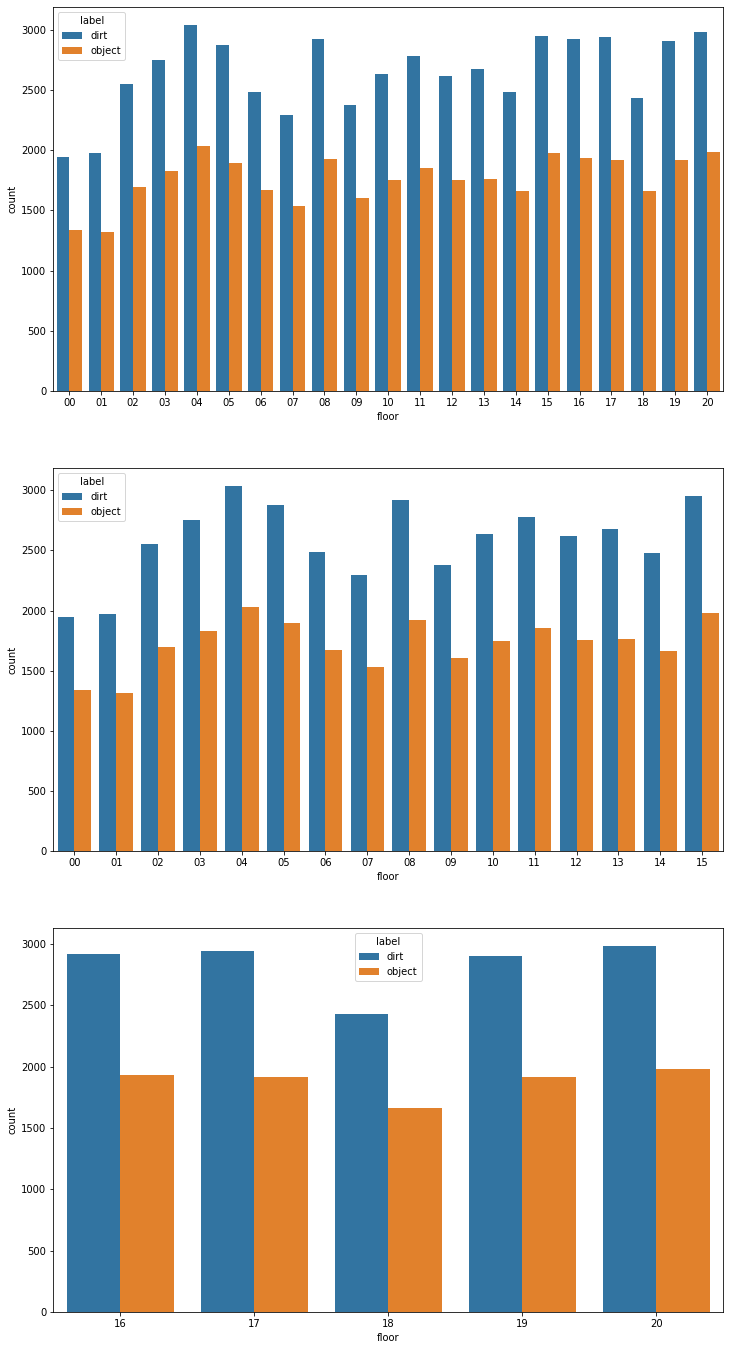

In [7]:
fig,axes = plt.subplots(3,1,figsize=(12,24))

sns.countplot(ax=axes[0],data=cleaned_main_list,x="floor",hue="label")
sns.countplot(ax=axes[1],data=cleaned_trg_list,x="floor",hue="label")
sns.countplot(ax=axes[2],data=cleaned_val_list,x="floor",hue="label")

<AxesSubplot:xlabel='floor', ylabel='count'>

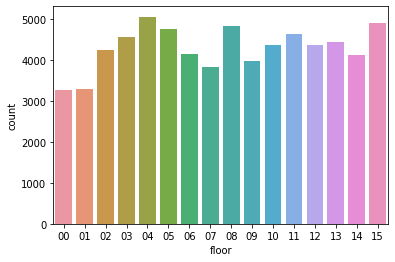

In [8]:
sns.countplot(data=trg_list,x="floor")

In [9]:
# data = {
#     "type":[],
#     "format":[],
#     "resolution":[],
#     "channel":[],
#     "color_space":[]
# }
# err_list=[]
# img_list = []
# for root,dirs,files in os.walk("images/raw"):
#     for file in files:
#         try:

#             img_path = os.path.join(root,file)
#             img_path = img_path.replace("\\","/")
#             path_splits = img_path.split("/")
#             type = path_splits[2]

#             img = Image.open(img_path)
#             img_list.append(img)

#             format = img.format
#             color_space = img.mode
#             resolution = img.size
#             tensor = np.array(img)
#             channel = tensor.shape[-1]

#             data["type"].append(type)
#             data["format"].append(format)
#             data["resolution"].append(resolution)
#             data["channel"].append(channel)
#             data["color_space"].append(color_space)   
#         except Exception as e:
#             err_list.append(file)


In [10]:
# data["resolution"][0]
# data["filename"] = data["type"]
# df = pd.DataFrame(data)
# df = df.drop(columns="type")

In [11]:
# data["resolution"][0]

In [12]:
# fig,axes = plt.subplots(4,1,figsize=(12,24))

# sns.countplot(ax=axes[0],data=df,x="format")
# sns.countplot(ax=axes[1],data=df,x="resolution")
# sns.countplot(ax=axes[2],data=df,x="channel")
# sns.countplot(ax=axes[3],data=df,x="color_space")

In [13]:
def save_data(table:pd.DataFrame,file_name):
        FILE_DIR = "images/processed/"
        if not os.path.exists(FILE_DIR):
            os.mkdir(FILE_DIR)
        try:
            table.to_csv(FILE_DIR+file_name,index=False)
        except:
            print(f"Something went wrong while saving {file_name} to {FILE_DIR}")
        return


In [14]:
# final_main_list = cleaned_main_list.drop(columns="floor")
# final_trg_list = cleaned_trg_list.drop(columns="floor")
# final_val_list = cleaned_val_list.drop(columns="floor")

save_data(cleaned_main_list,"cleaned_main.csv")
save_data(cleaned_trg_list,"cleaned_trg.csv")
save_data(cleaned_val_list,"cleaned_val.csv")

In [15]:
df_main = pd.read_csv("images/processed/cleaned_main.csv")
df_trg = pd.read_csv("images/processed/cleaned_trg.csv")
df_val = pd.read_csv("images/processed/cleaned_val.csv")

In [16]:
df_trg

,filename,X1,Y1,X2,Y2,label,floor
0,floor_000000_img_000000_r0_f0,586,236,640,357,dirt,0
1,floor_000000_img_000000_r0_f0,427,498,480,569,dirt,0
2,floor_000000_img_000000_r0_f0,380,706,446,783,dirt,0
3,floor_000000_img_000000_r0_f0,488,487,534,538,dirt,0
4,floor_000000_img_000000_r0_f0,302,611,355,678,dirt,0
...,...,...,...,...,...,...,...
68950,floor_000015_img_000060_r1_f3,571,424,652,482,dirt,15
68951,floor_000015_img_000060_r1_f3,1128,815,1279,968,dirt,15
68952,floor_000015_img_000060_r1_f3,1016,415,1279,596,object,15
68953,floor_000015_img_000060_r1_f3,75,564,126,661,object,15


In [17]:
# RAW_IMG_DIR = "images/raw/"
# PROCESSED_IMG_DIR = "images/processed/"
# floor_list = []
# floor_image_list = []
# def get_image_and_dirs():
#     for root,dirs,files in os.walk(RAW_IMG_DIR):
#         for file in files:

#             floor = get_floor(file)
#             try:
#                 floor = get_floor(file)
#                 floor_int = int(floor)
#                 if floor not in floor_list:
#                     floor_list.append(str(floor))
#                 floor_image_list.append(file)
                
#             except:
#                 print(f"Skipping file:{file} because it is not a floor image")
#     return

# def create_dirs():
#     # Create file dirs based on floor 
#     for floor in floor_list:
#         if not os.path.exists(PROCESSED_IMG_DIR+floor):
#             try:
#                 os.makedirs(PROCESSED_IMG_DIR+floor)
#             except:
#                 print(f"Error creating directory for floor {floor}")       
           
# def sample_images(image_list,subsample_size=0.1):
#     """
#     Args:
#         subsample_size: float representing percentage of image to subsample
#     Returns:
#         None
#     Moves every 1/subsample_size images to the processed folder
#     """
#     print("running")
#     print(len(image_list))
#     subsample_count = 1/subsample_size
#     counter = 0
    
#     for image in image_list:

#         if counter >= subsample_count:
#             floor = get_floor(image)
#             try:
#                 shutil.move(RAW_IMG_DIR+image,PROCESSED_IMG_DIR+floor+"/"+image)
#             except Exception as e:
#                 print(e)
#                 # print(f"Error occured while moving file: {image}")
#                 # print(RAW_IMG_DIR+image)
#                 # print(PROCESSED_IMG_DIR+floor+"/"+image)
#             counter = 0
#         counter += 1
        
        
# get_image_and_dirs()
# create_dirs()
# sample_images(floor_image_list)


In [18]:
processed_file_list = []
for root,dirs,files in os.walk("images/processed"):
    for file in files:
        processed_file_list.append(file[:-4])

indices_list = []
for each in processed_file_list:
    indices_list.append(cleaned_main_list["filename"][cleaned_main_list["filename"] == each].index)




In [19]:
cleaned_main_list

,filename,X1,Y1,X2,Y2,label,floor
0,floor_000000_img_000000_r0_f0,586,236,640,357,dirt,00
1,floor_000000_img_000000_r0_f0,427,498,480,569,dirt,00
2,floor_000000_img_000000_r0_f0,380,706,446,783,dirt,00
3,floor_000000_img_000000_r0_f0,488,487,534,538,dirt,00
4,floor_000000_img_000000_r0_f0,302,611,355,678,dirt,00
...,...,...,...,...,...,...,...
92547,floor_000020_img_000061_r1_f3,6,498,150,561,object,20
92548,floor_000020_img_000061_r1_f3,1066,401,1279,613,object,20
92549,floor_000020_img_000061_r1_f3,1158,871,1279,1023,object,20
92550,floor_000020_img_000061_r1_f3,919,139,1043,281,object,20


In [20]:
indices = []
for index in indices_list:
    for each in index:
        # print(each)
        indices.append(each)
# print(indices)
annos_df = cleaned_main_list.copy()
annos_df = annos_df.drop(columns="floor")
trg_img_annos = annos_df.iloc[indices]

In [21]:
# save_data(trg_img_annos,"trg_img_annos.csv")

In [22]:
df = pd.read_csv("images/processed/trg_img_annos.csv")

In [23]:
df

,filename,X1,Y1,X2,Y2,label
0,floor_000000_img_000001_r0_f2,843,974,864,994,dirt
1,floor_000000_img_000001_r0_f2,591,374,683,443,dirt
2,floor_000000_img_000001_r0_f2,897,853,993,1023,dirt
3,floor_000000_img_000001_r0_f2,451,411,489,445,dirt
4,floor_000000_img_000001_r0_f2,1239,652,1279,683,dirt
...,...,...,...,...,...,...
9228,floor_000020_img_000061_r0_f0,861,411,930,449,dirt
9229,floor_000020_img_000061_r0_f0,113,810,189,913,object
9230,floor_000020_img_000061_r0_f0,388,76,530,237,object
9231,floor_000020_img_000061_r0_f0,557,560,838,798,object


In [48]:
trg_df = pd.read_csv("images/raw/cleaned_trg.csv")
val_df = pd.read_csv("images/raw/cleaned_val.csv")
trg_df = trg_df.drop(columns="floor")
val_df = val_df.drop(columns="floor")

In [49]:
trg_df

,filename,X1,Y1,X2,Y2,label
0,floor_000000_img_000000_r0_f0,586,236,640,357,dirt
1,floor_000000_img_000000_r0_f0,427,498,480,569,dirt
2,floor_000000_img_000000_r0_f0,380,706,446,783,dirt
3,floor_000000_img_000000_r0_f0,488,487,534,538,dirt
4,floor_000000_img_000000_r0_f0,302,611,355,678,dirt
...,...,...,...,...,...,...
68950,floor_000015_img_000060_r1_f3,571,424,652,482,dirt
68951,floor_000015_img_000060_r1_f3,1128,815,1279,968,dirt
68952,floor_000015_img_000060_r1_f3,1016,415,1279,596,object
68953,floor_000015_img_000060_r1_f3,75,564,126,661,object


In [50]:
def create_labels(xmin, ymin, xmax, ymax):
    center_x, center_y = (xmax-xmin)/2, (ymax-ymin)/2
    width = xmax - xmin
    height = ymax - ymin
    return [(xmin+center_x)/1280, (ymin+center_y)/1024, width/1280, height/1024]

In [38]:
df["labels_new"]= df.apply(lambda x: create_labels(x.X1, x.Y1, x.X2, x.Y2), axis = 1)
df[['center_x', 'center_y', 'width', 'height']] = pd.DataFrame(df["labels_new"].tolist(), index = df.index)

df["label"] = df["label"].map({"dirt":1}).fillna(0)

df_cleaned = df[["filename", "label", 'center_x', 'center_y', 'width', 'height']]

for i in set(df_cleaned["filename"]):
    df_cleaned_sub = df_cleaned[df_cleaned['filename'] == i]
    df_cleaned_sub = df_cleaned_sub.drop(columns = ["filename"])
    df_cleaned_sub.to_csv(r"datasets/dirt/labels/{0}.txt".format(i), header=None, index=None, sep=' ', mode='a')

OSError: Cannot save file into a non-existent directory: 'datasets\dirt\labels'

In [51]:
trg_df["labels_new"]= trg_df.apply(lambda x: create_labels(x.X1, x.Y1, x.X2, x.Y2), axis = 1)
trg_df[['center_x', 'center_y', 'width', 'height']] = pd.DataFrame(trg_df["labels_new"].tolist(), index = trg_df.index)

trg_df["label"] = trg_df["label"].map({"dirt":1}).fillna(0)

trg_df_cleaned = trg_df[["filename", "label", 'center_x', 'center_y', 'width', 'height']]

for i in set(trg_df_cleaned["filename"]):
    trg_df_cleaned_sub = trg_df_cleaned[trg_df_cleaned['filename'] == i]
    trg_df_cleaned_sub = trg_df_cleaned_sub.drop(columns = ["filename"])
    trg_df_cleaned_sub.to_csv(r"datasets/dirt/train/labels/{0}.txt".format(i), header=None, index=None, sep=' ', mode='a')

In [52]:
val_df["labels_new"]= val_df.apply(lambda x: create_labels(x.X1, x.Y1, x.X2, x.Y2), axis = 1)
val_df[['center_x', 'center_y', 'width', 'height']] = pd.DataFrame(val_df["labels_new"].tolist(), index = val_df.index)

val_df["label"] = val_df["label"].map({"dirt":1}).fillna(0)

val_df_cleaned = val_df[["filename", "label", 'center_x', 'center_y', 'width', 'height']]

for i in set(val_df_cleaned["filename"]):
    val_df_cleaned_sub = val_df_cleaned[val_df_cleaned['filename'] == i]
    val_df_cleaned_sub = val_df_cleaned_sub.drop(columns = ["filename"])
    val_df_cleaned_sub.to_csv(r"datasets/dirt/val/labels/{0}.txt".format(i), header=None, index=None, sep=' ', mode='a')

In [53]:
trg_df["label"].value_counts()

1.0    41352
0.0    27603
Name: label, dtype: int64

In [27]:
df

,filename,X1,Y1,X2,Y2,label,labels_new,center_x,center_y,width,height
0,floor_000000_img_000001_r0_f2,843,974,864,994,1.0,"[0.666796875, 0.9609375, 0.666796875, 0.9609375]",0.666797,0.960938,0.666797,0.960938
1,floor_000000_img_000001_r0_f2,591,374,683,443,1.0,"[0.49765625, 0.39892578125, 0.49765625, 0.3989...",0.497656,0.398926,0.497656,0.398926
2,floor_000000_img_000001_r0_f2,897,853,993,1023,1.0,"[0.73828125, 0.916015625, 0.73828125, 0.916015...",0.738281,0.916016,0.738281,0.916016
3,floor_000000_img_000001_r0_f2,451,411,489,445,1.0,"[0.3671875, 0.41796875, 0.3671875, 0.41796875]",0.367188,0.417969,0.367188,0.417969
4,floor_000000_img_000001_r0_f2,1239,652,1279,683,1.0,"[0.98359375, 0.65185546875, 0.98359375, 0.6518...",0.983594,0.651855,0.983594,0.651855
...,...,...,...,...,...,...,...,...,...,...,...
9228,floor_000020_img_000061_r0_f0,861,411,930,449,1.0,"[0.699609375, 0.419921875, 0.699609375, 0.4199...",0.699609,0.419922,0.699609,0.419922
9229,floor_000020_img_000061_r0_f0,113,810,189,913,0.0,"[0.11796875, 0.84130859375, 0.11796875, 0.8413...",0.117969,0.841309,0.117969,0.841309
9230,floor_000020_img_000061_r0_f0,388,76,530,237,0.0,"[0.35859375, 0.15283203125, 0.35859375, 0.1528...",0.358594,0.152832,0.358594,0.152832
9231,floor_000020_img_000061_r0_f0,557,560,838,798,0.0,"[0.544921875, 0.6630859375, 0.544921875, 0.663...",0.544922,0.663086,0.544922,0.663086


In [28]:
# splitfolders.ratio("input_folder",output="output_folder",seed=1227,ratio=(.8,.1,.1),group_prefix=None,move=False)